In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv")

In [3]:
test.shape, train.shape

((2077964, 21), (3116945, 22))

In [4]:
train.head(10)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5,5,p,4.30,x,t,n,f,s,c,n,...,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,6,e,9.65,p,y,w,f,e,c,k,...,NaN,s,w,NaN,NaN,t,e,NaN,g,w
7,7,p,4.55,x,e,e,f,a,NaN,y,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
8,8,p,7.36,f,h,e,f,x,d,w,...,b,NaN,w,NaN,NaN,f,f,NaN,d,a
9,9,e,6.45,x,t,n,f,a,d,w,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a


In [5]:
train.columns.tolist()

['id',
 'class',
 'cap-diameter',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [7]:
test.isna().sum(), test.isna().mean() * 100

(id                            0
 cap-diameter                  7
 cap-shape                    31
 cap-surface              446904
 cap-color                    13
 does-bruise-or-bleed         10
 gill-attachment          349821
 gill-spacing             839595
 gill-color                   49
 stem-height                   1
 stem-width                    0
 stem-root               1838012
 stem-surface            1321488
 stem-color                   21
 veil-type               1971545
 veil-color              1826124
 has-ring                     19
 ring-type                 86195
 spore-print-color       1899617
 habitat                      25
 season                        0
 dtype: int64,
 id                       0.000000
 cap-diameter             0.000337
 cap-shape                0.001492
 cap-surface             21.506821
 cap-color                0.000626
 does-bruise-or-bleed     0.000481
 gill-attachment         16.834796
 gill-spacing            40.404694
 gill-color 

In [8]:
train.nunique()

id                      3116945
class                         2
cap-diameter               3913
cap-shape                    74
cap-surface                  83
cap-color                    78
does-bruise-or-bleed         26
gill-attachment              78
gill-spacing                 48
gill-color                   63
stem-height                2749
stem-width                 5836
stem-root                    38
stem-surface                 60
stem-color                   59
veil-type                    22
veil-color                   24
has-ring                     23
ring-type                    40
spore-print-color            32
habitat                      52
season                        4
dtype: int64

In [9]:
train.iloc[:, 1:]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [10]:
len(train[train['class'] == 'e']), len(train[train['class'] == 'p'])

(1411549, 1705396)

In [11]:
train.iloc[:, 1:].describe()

,cap-diameter,stem-height,stem-width
count,3.116941e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,6.348333e+00,1.115379e+01
std,4.657931e+00,2.699755e+00,8.095477e+00
min,3.000000e-02,0.000000e+00,0.000000e+00
25%,3.320000e+00,4.670000e+00,4.970000e+00
50%,5.750000e+00,5.880000e+00,9.650000e+00
75%,8.240000e+00,7.410000e+00,1.563000e+01
max,8.067000e+01,8.872000e+01,1.029000e+02


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


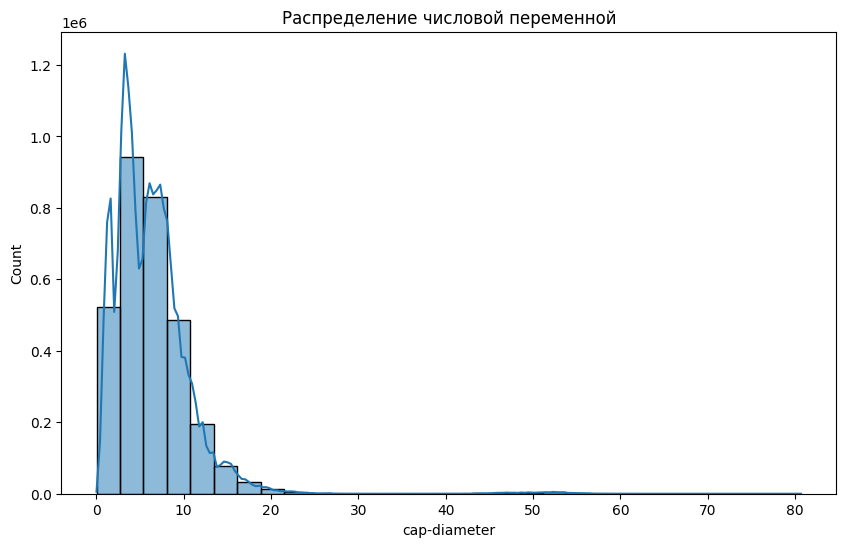

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(train['cap-diameter'], kde=True, bins=30)
plt.title('Распределение числовой переменной')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


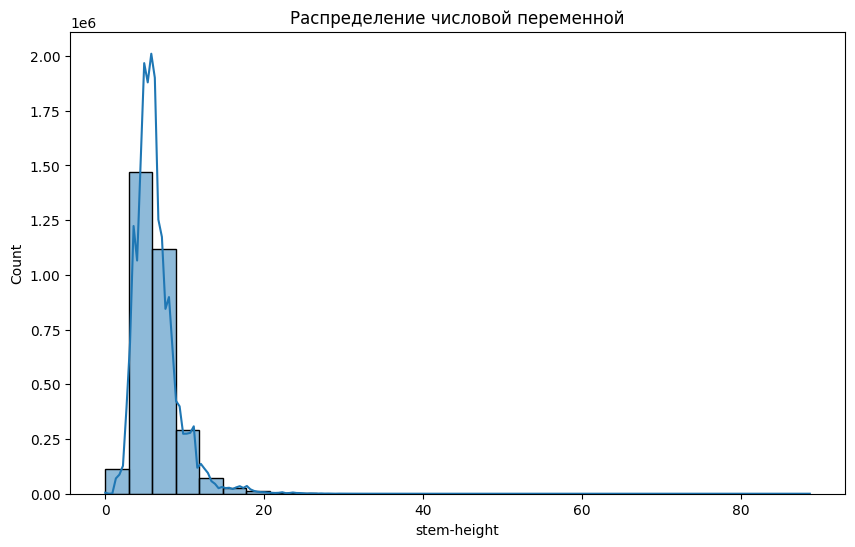

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(train['stem-height'], kde=True, bins=30)
plt.title('Распределение числовой переменной')
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


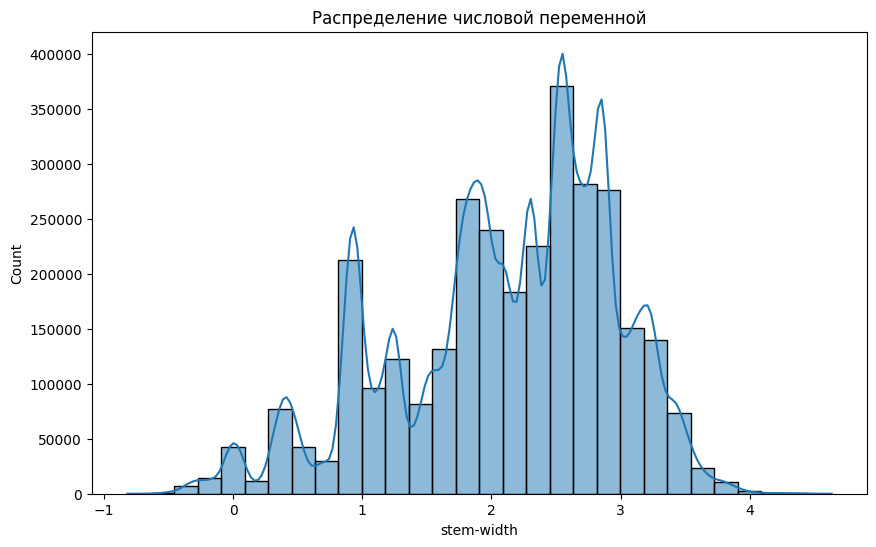

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(train['stem-width']), kde=True, bins=30)
plt.title('Распределение числовой переменной')
plt.show()

In [15]:
num_cols = ['cap-diameter', 'stem-height', 'stem-width']
cat_cols = [c for c in train.columns if c not in num_cols + ['id', 'class']]

In [16]:
for col in cat_cols:
    train[col] = train[col].fillna('Missing').astype(str)
    test[col] = test[col].fillna('Missing').astype(str)

In [17]:
target_map = {'e': 0, 'p': 1}
inv_target_map = {0: 'e', 1: 'p'}
train['class_encoded'] = train['class'].map(target_map)

In [18]:
X = train.drop(['id', 'class', 'class_encoded'], axis=1)
y = train['class_encoded']
X_test = test.drop(['id'], axis=1)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
model = CatBoostClassifier(
    iterations=2000,          
    learning_rate=0.05,
    eval_metric='MCC',         
    cat_features=cat_cols,     
    task_type="GPU",           
    devices='0',
    early_stopping_rounds=100,
    verbose=100,
    random_seed=42
)

In [21]:
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)

0:	learn: 0.6078088	test: 0.6032299	best: 0.6032299 (0)	total: 893ms	remaining: 29m 45s
100:	learn: 0.9762055	test: 0.9767631	best: 0.9767631 (100)	total: 1m 2s	remaining: 19m 28s
200:	learn: 0.9808942	test: 0.9812890	best: 0.9813182 (198)	total: 2m 2s	remaining: 18m 14s
300:	learn: 0.9819747	test: 0.9824058	best: 0.9824058 (300)	total: 2m 58s	remaining: 16m 48s
400:	learn: 0.9823901	test: 0.9828043	best: 0.9828043 (400)	total: 3m 52s	remaining: 15m 27s
500:	learn: 0.9826913	test: 0.9830862	best: 0.9830927 (499)	total: 4m 44s	remaining: 14m 11s
600:	learn: 0.9829131	test: 0.9832512	best: 0.9832512 (600)	total: 5m 36s	remaining: 13m 3s
700:	learn: 0.9830724	test: 0.9834001	best: 0.9834066 (697)	total: 6m 30s	remaining: 12m 2s
800:	learn: 0.9831849	test: 0.9834841	best: 0.9834938 (766)	total: 7m 24s	remaining: 11m 5s
900:	learn: 0.9833006	test: 0.9836104	best: 0.9836104 (900)	total: 8m 17s	remaining: 10m 6s
1000:	learn: 0.9833936	test: 0.9836493	best: 0.9836493 (949)	total: 9m 10s	remain

In [22]:
val_preds = model.predict(X_val)
score = matthews_corrcoef(y_val, val_preds)
print(f"Validation MCC Score: {score:.5f}")

Validation MCC Score: 0.98413


In [23]:
test_preds = model.predict(X_test)
submission = pd.DataFrame({
    'id': test['id'],
    'class': [inv_target_map[x] for x in test_preds]
})

submission.to_csv('submission.csv', index=False)